In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/AI/Tomatoes",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 28505 files belonging to 3 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Tomato___early_blight', 'Tomato___healthy', 'Tomato___late_blight']

In [ ]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[1 1 0 1 1 0 1 1 2 2 2 2 1 2 2 0 2 1 2 0 2 2 1 1 0 1 1 1 1 1 1 1]


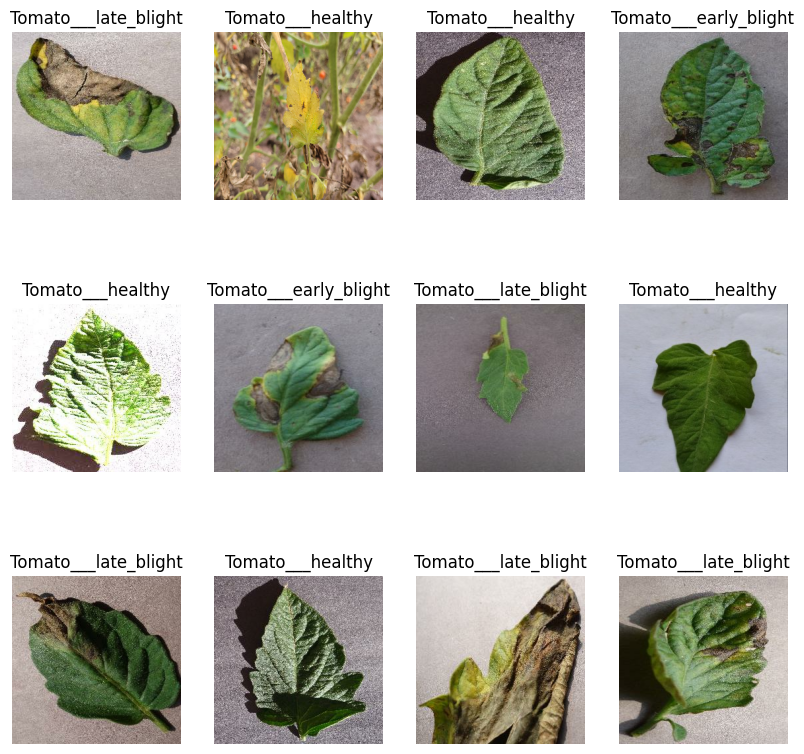

In [ ]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [ ]:
dataset_size = len(list(dataset))
train_size = int(0.8 * dataset_size)
val_size = int(0.1 * dataset_size)

train_ds = dataset.take(train_size)
val_ds = dataset.skip(train_size).take(val_size)
test_ds = dataset.skip(train_size + val_size)

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model = models.Sequential([
    # Add input shape to the first layer
    layers.InputLayer(input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),

    # Rescaling
    layers.Rescaling(1./255),
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.5),
    layers.RandomZoom(0.5),
    # Convolutional layers
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')
])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_flip (RandomFlip)             │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_rotation (RandomRotation)     │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_zoom (RandomZoom)             │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,664,387 (25.42 MB)

 Trainable params: 6,664,387 (25.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Or 'sparse_categorical_crossentropy' if labels are integers
    metrics=['accuracy']
)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1)

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=[early_stopping, lr_scheduler]
)

Epoch 1/50
712/712 ━━━━━━━━━━━━━━━━━━━━ 136s 132ms/step - accuracy: 0.6067 - loss: 0.8316 - val_accuracy: 0.7047 - val_loss: 0.8467 - learning_rate: 0.0010
Epoch 2/50
712/712 ━━━━━━━━━━━━━━━━━━━━ 54s 75ms/step - accuracy: 0.7932 - loss: 0.4922 - val_accuracy: 0.7363 - val_loss: 0.6484 - learning_rate: 0.0010
Epoch 3/50
712/712 ━━━━━━━━━━━━━━━━━━━━ 53s 74ms/step - accuracy: 0.8383 - loss: 0.4027 - val_accuracy: 0.7893 - val_loss: 0.5674 - learning_rate: 0.0010
Epoch 4/50
712/712 ━━━━━━━━━━━━━━━━━━━━ 53s 75ms/step - accuracy: 0.8548 - loss: 0.3651 - val_accuracy: 0.8311 - val_loss: 0.4181 - learning_rate: 0.0010
Epoch 5/50
712/712 ━━━━━━━━━━━━━━━━━━━━ 53s 74ms/step - accuracy: 0.8747 - loss: 0.3272 - val_accuracy: 0.8357 - val_loss: 0.4730 - learning_rate: 0.0010
Epoch 6/50
712/712 ━━━━━━━━━━━━━━━━━━━━ 53s 74ms/step - accuracy: 0.8863 - loss: 0.2918 - val_accuracy: 0.8831 - val_loss: 0.2947 - learning_rate: 0.0010
Epoch 7/50
712/712 ━━━━━━━━━━━━━━━━━━━━ 53s 74ms/step - accuracy: 0.9088 -

In [ ]:
scores = model.evaluate(test_ds)

90/90 ━━━━━━━━━━━━━━━━━━━━ 47s 57ms/step - accuracy: 0.9565 - loss: 0.1197


In [ ]:
history.params


{'verbose': 'auto', 'epochs': 50, 'steps': 712}

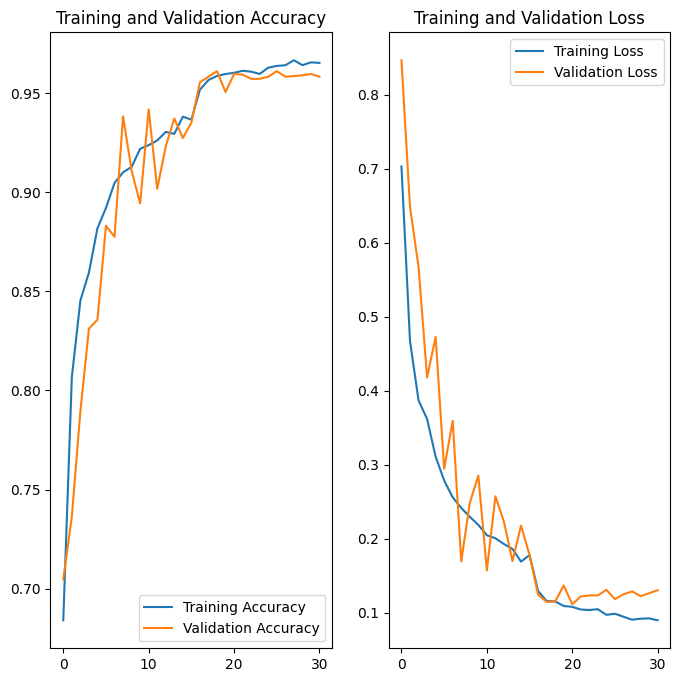

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


# Get the actual number of epochs the training ran for
num_epochs = len(acc)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
# Use num_epochs to generate the x-axis values
plt.plot(range(num_epochs), acc, label='Training Accuracy')
plt.plot(range(num_epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
# Use num_epochs to generate the x-axis values
plt.plot(range(num_epochs), loss, label='Training Loss')
plt.plot(range(num_epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

90/90 ━━━━━━━━━━━━━━━━━━━━ 56s 57ms/step


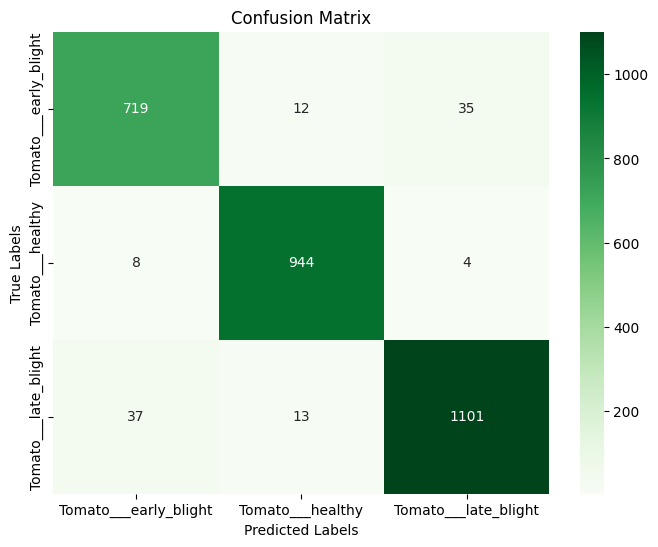

In [ ]:
# prompt: write a code for confusion matrix

import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

model = tf.keras.models.load_model('/content/drive/MyDrive/AI/Models/Tomato_tensorflow_V1.keras')
# Get predictions on the test set
predictions = model.predict(test_ds)
predicted_labels = np.argmax(predictions, axis=1)

# Get true labels from the test dataset
true_labels = []
for _, labels in test_ds:
    true_labels.extend(labels.numpy())
true_labels = np.array(true_labels)


# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# prompt: write a code that gets me the f1 score percison and recall and any statsics of the model  and visualize it

from sklearn.metrics import classification_report

# ... (Your existing code) ...

# Get predictions on the test set
predictions = model.predict(test_ds)
predicted_labels = np.argmax(predictions, axis=1)

# Get true labels from the test dataset
true_labels = []
for _, labels in test_ds:
    true_labels.extend(labels.numpy())
true_labels = np.array(true_labels)

# Generate classification report
report = classification_report(true_labels, predicted_labels, target_names=class_names, output_dict=True)

# Print the report
print(classification_report(true_labels, predicted_labels, target_names=class_names))


# Extract relevant metrics
accuracy = report['accuracy']
macro_precision = report['macro avg']['precision']
macro_recall = report['macro avg']['recall']
macro_f1 = report['macro avg']['f1-score']
weighted_precision = report['weighted avg']['precision']
weighted_recall = report['weighted avg']['recall']
weighted_f1 = report['weighted avg']['f1-score']

print(f"Accuracy: {accuracy}")
print(f"Macro Precision: {macro_precision}")
print(f"Macro Recall: {macro_recall}")
print(f"Macro F1-score: {macro_f1}")
print(f"Weighted Precision: {weighted_precision}")
print(f"Weighted Recall: {weighted_recall}")
print(f"Weighted F1-score: {weighted_f1}")

# Visualize the classification report (optional)
import pandas as pd
df = pd.DataFrame(report).transpose()
df
# You can further customize the visualization of the dataframe 'df' as needed.

90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
                       precision    recall  f1-score   support

Tomato___early_blight       0.94      0.94      0.94       768
     Tomato___healthy       0.97      0.99      0.98       950
 Tomato___late_blight       0.97      0.96      0.96      1155

             accuracy                           0.96      2873
            macro avg       0.96      0.96      0.96      2873
         weighted avg       0.96      0.96      0.96      2873

Accuracy: 0.9613644274277758
Macro Precision: 0.9596354597109196
Macro Recall: 0.9603206762170577
Macro F1-score: 0.9599541209822666
Weighted Precision: 0.9613232035354127
Weighted Recall: 0.9613644274277758
Weighted F1-score: 0.9613182158964663


,precision,recall,f1-score,support
Tomato___early_blight,0.940026,0.938802,0.939414,768.000000
Tomato___healthy,0.973001,0.986316,0.979613,950.000000
Tomato___late_blight,0.965879,0.955844,0.960836,1155.000000
accuracy,0.961364,0.961364,0.961364,0.961364
macro avg,0.959635,0.960321,0.959954,2873.000000
weighted avg,0.961323,0.961364,0.961318,2873.000000


first image to predict
actual label: Tomato___late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
predicted label: Tomato___late_blight


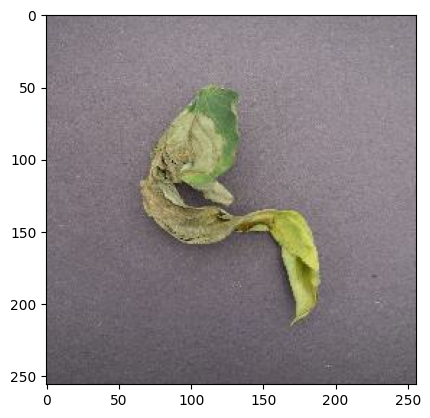

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


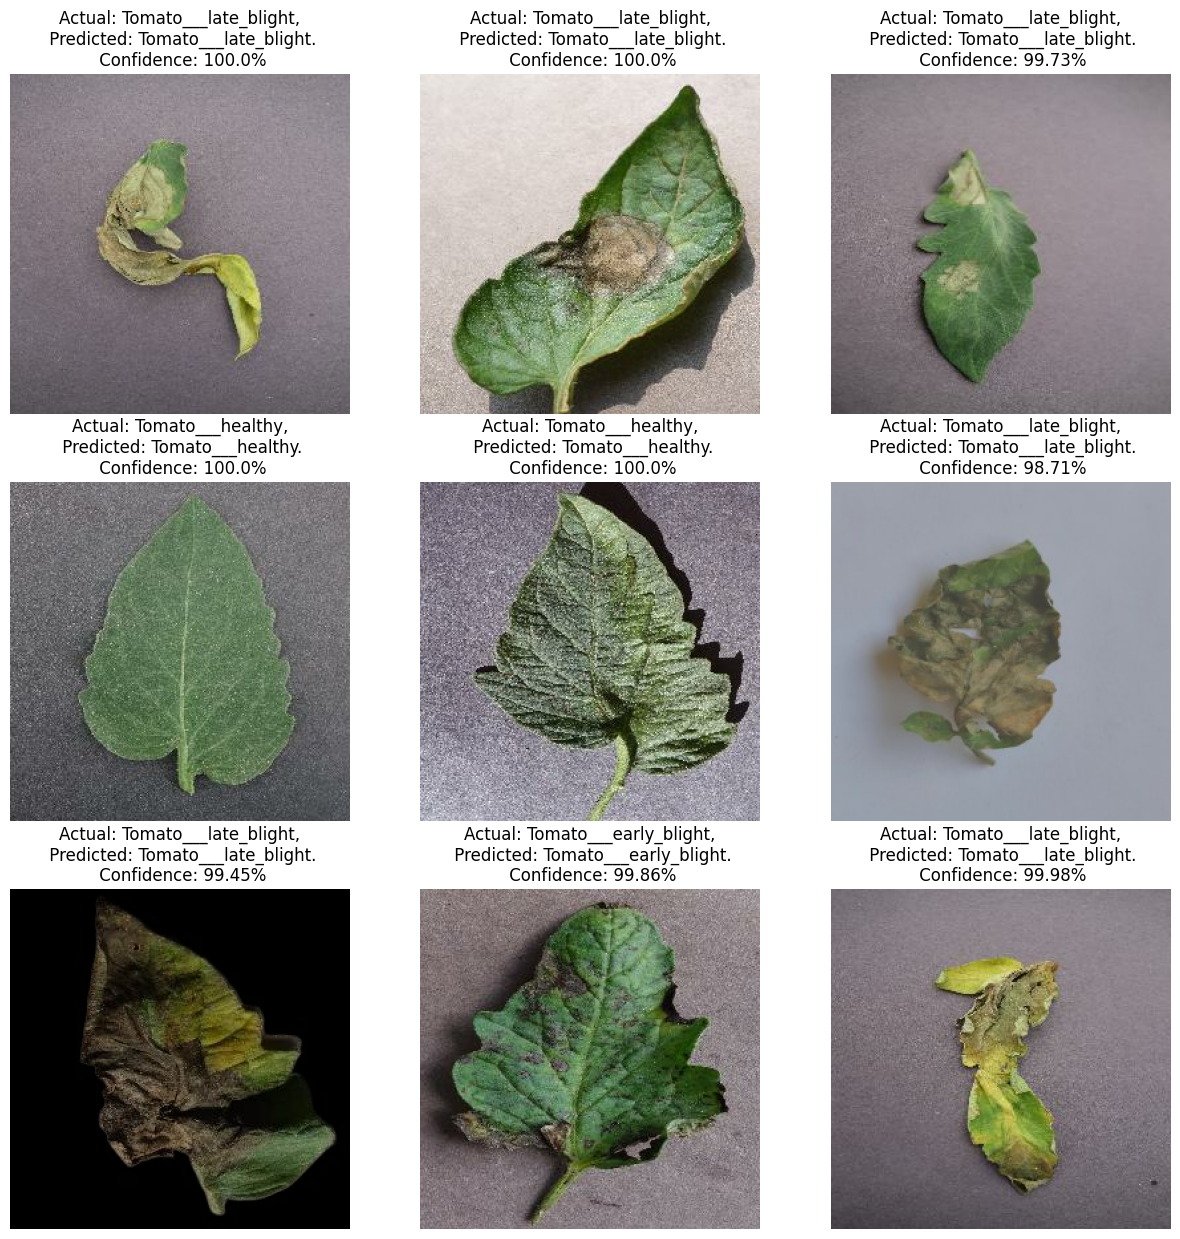

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

Saving images (1).jpeg to images (1).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


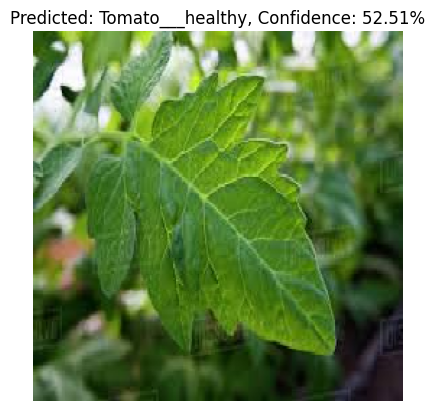

In [ ]:
# prompt: write a code so i can upload an image and test it

from google.colab import files
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# ... (Your existing code) ...

# Function to predict the class of an uploaded image
def predict_uploaded_image(model, uploaded_image_path):
    img = tf.keras.preprocessing.image.load_img(uploaded_image_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence


# Upload the image
uploaded = files.upload()

for fn in uploaded.keys():
    image_path = fn  # Get the uploaded file path
    predicted_class, confidence = predict_uploaded_image(model, image_path)

    # Display the image and prediction
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}, Confidence: {confidence}%")
    plt.axis('off')
    plt.show()

In [ ]:
model.save("tomatato_1.keras")

In [ ]:
model_version=1
model.save(f"/content/drive/MyDrive/AI/Models/Tomato_tensorflow_V{model_version}.keras")

In [ ]:
model.save(f"/content/drive/MyDrive/AI/Models/Tomato_tensorflow_V{model_version}.h5")

TypeError: cannot pickle 'module' object